In [1]:
import os.path

import pandas as pd
import torch
from transformers import AutoTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/preprocessed/cleaned.csv")

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [4]:
def tokenize_function(text):
    return tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')

In [5]:
tokenized = tokenize_function(data['review_text'].tolist())

In [6]:
# Convert tensors to list format and assign them correctly
data['input_ids'] = tokenized['input_ids'].squeeze().tolist()
data['token_type_ids'] = tokenized['token_type_ids'].squeeze().tolist()
data['attention_mask'] = tokenized['attention_mask'].squeeze().tolist()

In [7]:
data['input_ids']

0        [101, 2220, 3229, 3319, 102, 0, 0, 0, 0, 0, 0,...
1        [101, 2339, 2180, 2102, 2023, 8816, 102, 0, 0,...
2        [101, 2428, 10392, 2208, 3325, 1037, 5257, 199...
3        [101, 2175, 2041, 2006, 2019, 6172, 1010, 2022...
4        [101, 1996, 2190, 2517, 2208, 1045, 2031, 2412...
                               ...                        
16484    [101, 2070, 2335, 2023, 2208, 2097, 1625, 3015...
16485    [101, 2428, 5024, 5519, 6293, 13108, 2007, 438...
16486    [101, 3565, 2567, 102, 0, 0, 0, 0, 0, 0, 0, 0,...
16487    [101, 10424, 8004, 11528, 12476, 2021, 2025, 3...
16488    [101, 2023, 2208, 2003, 2428, 12476, 1012, 229...
Name: input_ids, Length: 16489, dtype: object

In [8]:
data

,app_id,app_name,review_text,review_score,urls,contains_url,raw_text,review_length,word_counts,input_ids,token_type_ids,attention_mask
0,252490,Rust,early access review,1,[],False,Early Access Review,19,3,"[101, 2220, 3229, 3319, 102, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,107410,Arma 3,why wont this download,1,[],False,? why won't this download,22,4,"[101, 2339, 2180, 2102, 2023, 8816, 102, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,459010,Ghost Town Mine Ride & Shootin' Gallery,really fantastic game experience a combination...,1,[],False,Really fantastic game experience - a combinati...,390,70,"[101, 2428, 10392, 2208, 3325, 1037, 5257, 199...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,8930,Sid Meier's Civilization V,"go out on an adventure, be honerouble, get res...",1,[],False,"Go out on an adventure, be honerouble, get res...",1377,256,"[101, 2175, 2041, 2006, 2019, 6172, 1010, 2022...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,108710,Alan Wake,the best written game i have ever played as we...,1,[],False,The best written game I have ever played as we...,537,103,"[101, 1996, 2190, 2517, 2208, 1045, 2031, 2412...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16484,255710,Cities: Skylines,some times this game will ♥♥♥♥ you over realy ...,1,[],False,some times this game will ♥♥♥♥ YOU OVER REALY ...,188,41,"[101, 2070, 2335, 2023, 2208, 2097, 1625, 3015...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
16485,250110,Assault Android Cactus,really solid twin stick shooter with tight con...,1,[],False,Really solid twin stick shooter with tight con...,849,149,"[101, 2428, 5024, 5519, 6293, 13108, 2007, 438...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
16486,205950,Jet Set Radio,super brother,1,[],False,Super brother,13,2,"[101, 3565, 2567, 102, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16487,377160,Fallout 4,friggin awesome but not quite as good as fnv yet.,1,[],False,Friggin awesome but not quite as good as FNV.....,49,10,"[101, 10424, 8004, 11528, 12476, 2021, 2025, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['input_ids']], data['review_score'], test_size=0.2,random_state=42)

In [11]:
len(X_train['input_ids'].iloc[0])
len(X_train['input_ids'].iloc[1])

128

In [12]:
torch.tensor(X_train['input_ids'].tolist())

tensor([[  101,  2023,  1998,  ...,     0,     0,     0],
        [  101,  2023,  2208,  ...,     0,     0,     0],
        [  101,  2428,  5959,  ...,     0,     0,     0],
        ...,
        [  101,  8680,  2208,  ...,     0,     0,     0],
        [  101,  1045,  2123,  ...,     0,     0,     0],
        [  101, 25430,  8490,  ...,     0,     0,     0]])

In [13]:
from torch.utils.data import Dataset, DataLoader

In [14]:
class RatingDataset(Dataset):
    def __init__(self, ids: pd.DataFrame, labels: pd.Series):
        self.ids = torch.tensor(ids['input_ids'].tolist(), dtype=torch.long)
        self.labels = torch.tensor(labels.tolist(), dtype=torch.float).unsqueeze(1)

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return self.ids[idx], self.labels[idx]


In [15]:
train_ds = RatingDataset(X_train, y_train)
val_ds = RatingDataset(X_test, y_test)

In [16]:
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=128, shuffle=False)

In [17]:
texts, labels = next(iter(train_dl))
texts.shape, labels.shape

(torch.Size([128, 128]), torch.Size([128, 1]))

In [18]:
tokenizer.decode(texts[0])

'[CLS] absolutely, awesome definite buy but better with dlc. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [19]:
texts[0]

tensor([  101,  7078,  1010, 12476, 15298,  4965,  2021,  2488,  2007, 21469,
         2278,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [20]:
import torch.nn as nn
from torch import optim

In [21]:
# class SentimentLSTM(nn.Module):
#     def __init__(self, vocab_length, maxlen):
#         super(SentimentLSTM, self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=vocab_length, embedding_dim=128, max_norm=maxlen)
#         self.bidirectional_lstm = nn.LSTM(input_size=128, hidden_size=128, batch_first=True, bidirectional=True)
#         self.gru = nn.GRU(input_size=256, hidden_size=64, batch_first=True)  # 256: 128 * 2 for bidirectional LSTM
#         self.lstm = nn.LSTM(input_size=64, hidden_size=64, batch_first=True)
#         self.fc1 = nn.Linear(in_features=64, out_features=16)
#         self.bn = nn.BatchNorm1d(num_features=16)
#         self.dropout = nn.Dropout(0.1)
#         self.output = nn.Linear(in_features=16, out_features=1)
#
#     def forward(self, x):
#         x = self.embedding(x)
#         x, _ = self.bidirectional_lstm(x)
#         x, _ = self.gru(x)
#         x, _ = self.lstm(x)
#         x = x[:, -1, :]  # Take the last time step's output
#         x = self.fc1(x)
#         x = nn.ReLU()(x)
#         x = self.bn(x)
#         x = self.dropout(x)
#         x = self.output(x)
#         return x

In [22]:
# class Attention(nn.Module):
#     def __init__(self, hidden_size):
#         super(Attention, self).__init__()
#         self.attention = nn.Linear(hidden_size, 1)
#
#     def forward(self, x):
#         # x: (batch_size, seq_length, hidden_size)
#         scores = self.attention(x).squeeze(-1)  # (batch_size, seq_length)
#         weights = nn.functional.softmax(scores, dim=1)  # (batch_size, seq_length)
#         output = (x * weights.unsqueeze(-1)).sum(dim=1)  # (batch_size, hidden_size)
#         return output, weights
#
#
# class SentimentLSTM(nn.Module):
#     def __init__(self, vocab_length):
#         super(SentimentLSTM, self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=vocab_length, embedding_dim=256, padding_idx=0)
#         self.bidirectional_lstm = nn.LSTM(input_size=256, hidden_size=128, batch_first=True, bidirectional=True)
#         self.transition = nn.Linear(256, 256)
#         self.attention = Attention(hidden_size=256)  # BiLSTM hidden_dim * 2
#         self.gru = nn.GRU(input_size=256, hidden_size=128, batch_first=True)
#         self.fc1 = nn.Linear(in_features=128, out_features=64)
#         self.bn1 = nn.BatchNorm1d(num_features=64)
#         self.dropout1 = nn.Dropout(0.3)
#         self.fc2 = nn.Linear(in_features=64, out_features=16)
#         self.bn2 = nn.BatchNorm1d(num_features=16)
#         self.dropout2 = nn.Dropout(0.3)
#         self.output = nn.Linear(in_features=16, out_features=1)
#
#     def forward(self, x):
#         x = self.embedding(x)
#         x, _ = self.bidirectional_lstm(x)
#         print(x.shape)
#         x,_ = self.attention(x)
#         print(x.shape)
#         # x = self.transition(x)
#         x, _ = self.gru(x)
#         x = self.fc1(x)
#         x = nn.LeakyReLU()(x)
#         print(x.shape)
#         x = self.bn1(x)
#         x = self.dropout1(x)
#         x = self.fc2(x)
#         x = nn.LeakyReLU()(x)
#         x = self.bn2(x)
#         x = self.dropout2(x)
#         x = self.output(x)
#         return x

In [23]:
from datetime import datetime

In [24]:
class SentimentLSTM(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.3):
        super(SentimentLSTM, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=no_layers,
            batch_first=True
        )

        # Dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        batch_size = x.size(0)

        # Initialize hidden state and cell state
        h = torch.zeros(self.no_layers, batch_size, self.hidden_dim).to(x.device)
        c = torch.zeros(self.no_layers, batch_size, self.hidden_dim).to(x.device)

        # Embedding and LSTM
        embeds = self.embedding(x)  # Shape: (batch_size, seq_length, embedding_dim)
        lstm_out, (h, c) = self.lstm(embeds, (h, c))  # Shape of lstm_out: (batch_size, seq_length, hidden_dim)

        # Take the hidden state from the last timestep
        last_hidden = lstm_out[:, -1, :]  # Shape: (batch_size, hidden_dim)

        # Dropout and fully connected layer
        out = self.dropout(last_hidden)
        out = self.fc(out)  # Shape: (batch_size, output_dim)

        return out

In [25]:
len(tokenizer)

30522

In [26]:
device = torch.device("cuda")
device

device(type='cuda')

In [27]:
model = SentimentLSTM(no_layers=4,vocab_size=len(tokenizer)+1,hidden_dim=256,embedding_dim=128,output_dim=1,drop_prob=0.3)
model = model.to(device)
print(model)

SentimentLSTM(
  (embedding): Embedding(30523, 128)
  (lstm): LSTM(128, 256, num_layers=4, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


In [28]:
criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

In [39]:
False *2

0

In [29]:
# Test the model with a batch from the training DataLoader
batch_ids, batch_labels = next(iter(train_dl))
batch_ids, batch_labels = batch_ids.to(device), batch_labels.to(device)
with torch.no_grad():
    print(batch_ids.shape)
    out = model(batch_ids)
    print(out.shape)
    loss = criterion(batch_labels, out)
  # Should match the batch size and output dimensions

torch.Size([128, 128])
torch.Size([128, 1])


In [30]:
from candle import Trainer
from candle.metrics import Accuracy, Precision, Recall
from candle.callbacks import EarlyStopping

In [31]:
metrics = [Accuracy(), Precision(), Recall()]

In [32]:
trainer = Trainer(
    model=model,
    criterion=criterion,
    input_shape=(128,128),
    optimizer=optimizer,
    metrics=metrics,
    callbacks=[EarlyStopping(basis="val_accuracy", metric_minimize=False, patience=10, threshold=0.85)],
    display_time_elapsed=True,
    device=torch.device('cuda')
)

In [33]:
history = trainer.fit(train_dl, val_dl, epochs=100)

EPOCH 0: : 104it [00:06, 16.64it/s]
--> Metrics:   accuracy: 0.7968 ,val_accuracy: 0.8286 ,precision: 0.8045 ,val_precision: 0.8286 ,recall: 0.9540 ,val_recall: 1.0000 ,loss: 0.5034 ,val_loss: 0.4585
Time elapsed: 6.8480987548828125 s
----------------------------------------------------------------------------------------------------
EPOCH 1: : 104it [00:05, 17.74it/s]
--> Metrics:   accuracy: 0.8243 ,val_accuracy: 0.8286 ,precision: 0.8243 ,val_precision: 0.8286 ,recall: 1.0000 ,val_recall: 1.0000 ,loss: 0.4634 ,val_loss: 0.4569
Time elapsed: 13.328080654144287 s
----------------------------------------------------------------------------------------------------
EPOCH 2: : 104it [00:06, 17.16it/s]
--> Metrics:   accuracy: 0.8230 ,val_accuracy: 0.8286 ,precision: 0.8230 ,val_precision: 0.8286 ,recall: 1.0000 ,val_recall: 1.0000 ,loss: 0.4640 ,val_loss: 0.4564
Time elapsed: 19.96237087249756 s
----------------------------------------------------------------------------------------------

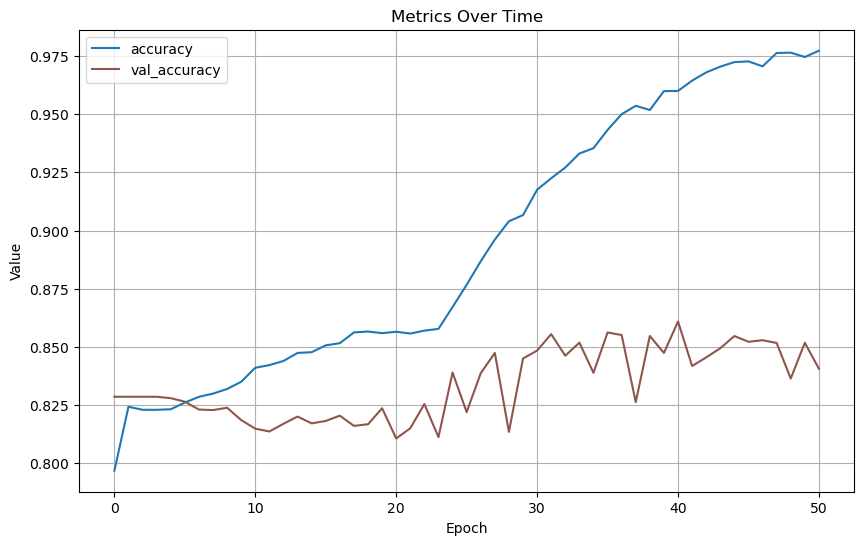

In [34]:
trainer.tracker.plot("accuracy", "val_accuracy")

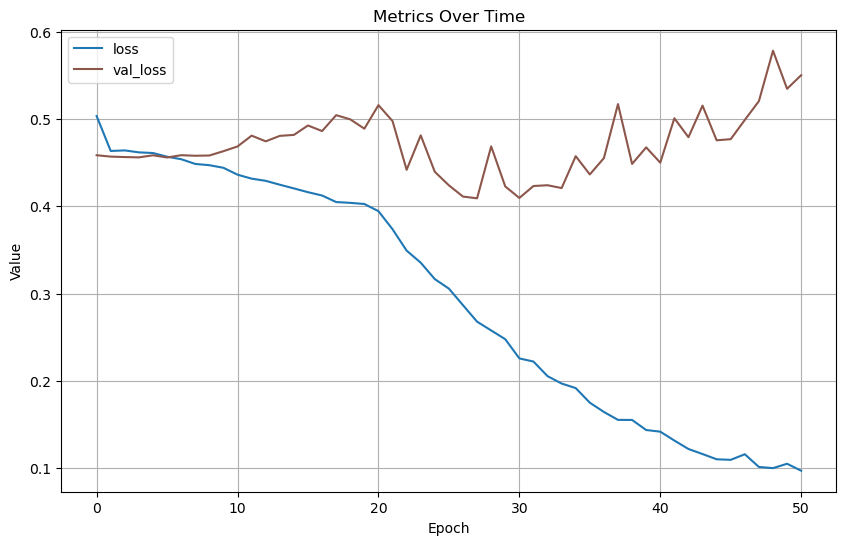

In [35]:
trainer.tracker.plot("loss", "val_loss")

In [36]:
trainer.save_progress(path="artifacts/lstm",metric_name="val_accuracy")

Successfully saved progress!


In [37]:
trainer.final_metrics

{'epoch': 40,
 'accuracy': 0.9599609375,
 'val_accuracy': 0.8609080651491366,
 'precision': 0.9695306722445415,
 'val_precision': 0.8873204502125258,
 'recall': 0.9822946994436675,
 'val_recall': 0.9528023225252577,
 'loss': 0.1418184779691868,
 'val_loss': 0.449996965435835}